In [1]:
from generator_utils import generate_demand, generate_innovations, generate_phi, generate_theta, generate_sigma_U, simulate_arma22, add_dimensions
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
dimensions = 3

"""
generate the covariance matrix for the innovations U
- diagonal: increasing the scale_diagonal increases the variance of the innovations --> more volatile
- off-diagonal: increasing the scale_off_diagonal increases the correlation between the innovations --> more synchronized
"""
sigma_U = generate_sigma_U(num_dimensions=dimensions, scale_diagonal=0.05, scale_off_diagonal=0.05)
sigma_U_2 = generate_sigma_U(num_dimensions=dimensions, scale_diagonal=0.8, scale_off_diagonal=0.05)

"""
Set up the AutoRegressive coefficents (AR) 

Influence: How much past values of the time series affect the current value.
- decrease: make data more random / unpredictable
- increase: make data more predictable
"""
Phi1, Phi2 = generate_phi(num_dimensions=dimensions, factor=1)
Phi1_2, Phi2_2 = generate_phi(num_dimensions=dimensions, factor=1)
print(Phi1, Phi2)

"""
Set up the Moving Average coefficients (MA)

Influence: How much past error terms (unexpected shocks) affect the current value.
- increse: make data more dependent on past shocks/errors, make data more volatile
- decrease: less sensitve to shocks
"""
Theta1, Theta2 = generate_theta(num_dimensions=dimensions, factor=1)
Theta1_2, Theta2_2 = generate_theta(num_dimensions=dimensions, factor=1)

# define the number of periods to simulate
n_periods = 1000000
# simulate the ARMA process
X = simulate_arma22(n_periods=n_periods, Phi1=Phi1, Phi2=Phi2, Theta1=Theta1, Theta2=Theta2, sigma_U=sigma_U, num_dimensions=dimensions)
X_2 = simulate_arma22(n_periods=n_periods, Phi1=Phi1_2, Phi2=Phi2_2, Theta1=Theta1_2, Theta2=Theta2_2, sigma_U=sigma_U_2, num_dimensions=dimensions)
print(X_2[50:55])
# generate the demand
Y = generate_demand(X=X[:,:3], n_periods=n_periods)
Y_2 = generate_demand(X=X_2[:,:3], n_periods=n_periods)



[[ 0.5 -0.9  0. ]
 [ 1.1 -0.7  0. ]
 [ 0.   0.   0.5]] [[ 0.  -0.5  0. ]
 [-0.5  0.   0. ]
 [ 0.   0.   0. ]]
[[ 3.00142257  0.83895163  1.24807278]
 [ 0.67191593  2.44322702  0.2184646 ]
 [-2.00469058 -4.90954295  1.64668035]
 [ 3.37719006  1.38184369  1.92668589]
 [ 5.12112451  0.67025468  1.01139532]]


In [9]:
print(Y_2[50:55])
print(Y[50:55])

[[ 0.         32.08487043  0.         11.5604706   0.          0.
   9.77512119  0.          0.         30.81792727 23.54976962  1.55605483]
 [ 0.         13.01404798  0.          0.57398151  5.12615733 10.80337393
  10.75611421  6.25960026 11.66300668 12.14190506 18.06608126 32.59550374]
 [33.4963127   0.          0.          0.          0.          0.
  77.73001513  0.          0.          4.95510188  0.         86.72488161]
 [ 0.          0.80388332 51.55503203  2.49849215  7.37333215  0.
   8.85136633  0.          1.83520703  1.0232389   0.          3.57484274]
 [13.35026284  0.          0.         13.3200083  11.49310334 40.00219904
   3.85354791  5.03044353  3.5296591  10.13335531 12.315846    0.        ]]
[[1.65610231 0.         3.78711899 1.69972961 0.49556187 2.14751994
  0.94151542 2.7942454  2.00410192 0.         0.         0.        ]
 [0.03451927 2.16699766 0.         0.56206144 1.29708132 2.1815008
  2.8213338  1.56503192 2.36904632 2.73452342 2.69262166 5.99393237]
 [4.1

In [3]:
print(X.shape, Y.shape)

df_target = pd.DataFrame(Y, columns=['Demand1', 'Demand2', 'Demand3', 'Demand4', 'Demand5', 'Demand6', 'Demand7', 'Demand8', 'Demand9', 'Demand10', 'Demand11', 'Demand12'])
df_features = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3'])#, 'Feature4', 'Feature5', 'Feature6'])#, 'Feature7', 'Feature8', 'Feature9', 'Feature10', 'Feature11', 'Feature12'])
df_target_2 = pd.DataFrame(Y_2, columns=['Demand1', 'Demand2', 'Demand3', 'Demand4', 'Demand5', 'Demand6', 'Demand7', 'Demand8', 'Demand9', 'Demand10', 'Demand11', 'Demand12'])
df_features_2 = pd.DataFrame(X_2, columns=['Feature1', 'Feature2', 'Feature3'])#, 'Feature4', 'Feature5', 'Feature6'])#, 'Feature7', 'Feature8', 'Feature9', 'Feature10', 'Feature11', 'Feature12'])

variance_target = df_target.var()
print(variance_target)

variance_target_2 = df_target_2.var()
print(variance_target_2)



(1000000, 3) (1000000, 12)
Demand1      9.926315
Demand2      9.172257
Demand3     19.736932
Demand4     10.338411
Demand5      8.002624
Demand6      9.346069
Demand7     10.284115
Demand8      7.972384
Demand9      9.233263
Demand10     9.850454
Demand11     9.213474
Demand12    19.763892
dtype: float64
Demand1     157.190006
Demand2     133.894980
Demand3     309.315903
Demand4     155.957578
Demand5     132.432963
Demand6     141.629427
Demand7     157.118119
Demand8     132.710893
Demand9     141.891372
Demand10    156.584189
Demand11    134.726174
Demand12    307.518374
dtype: float64


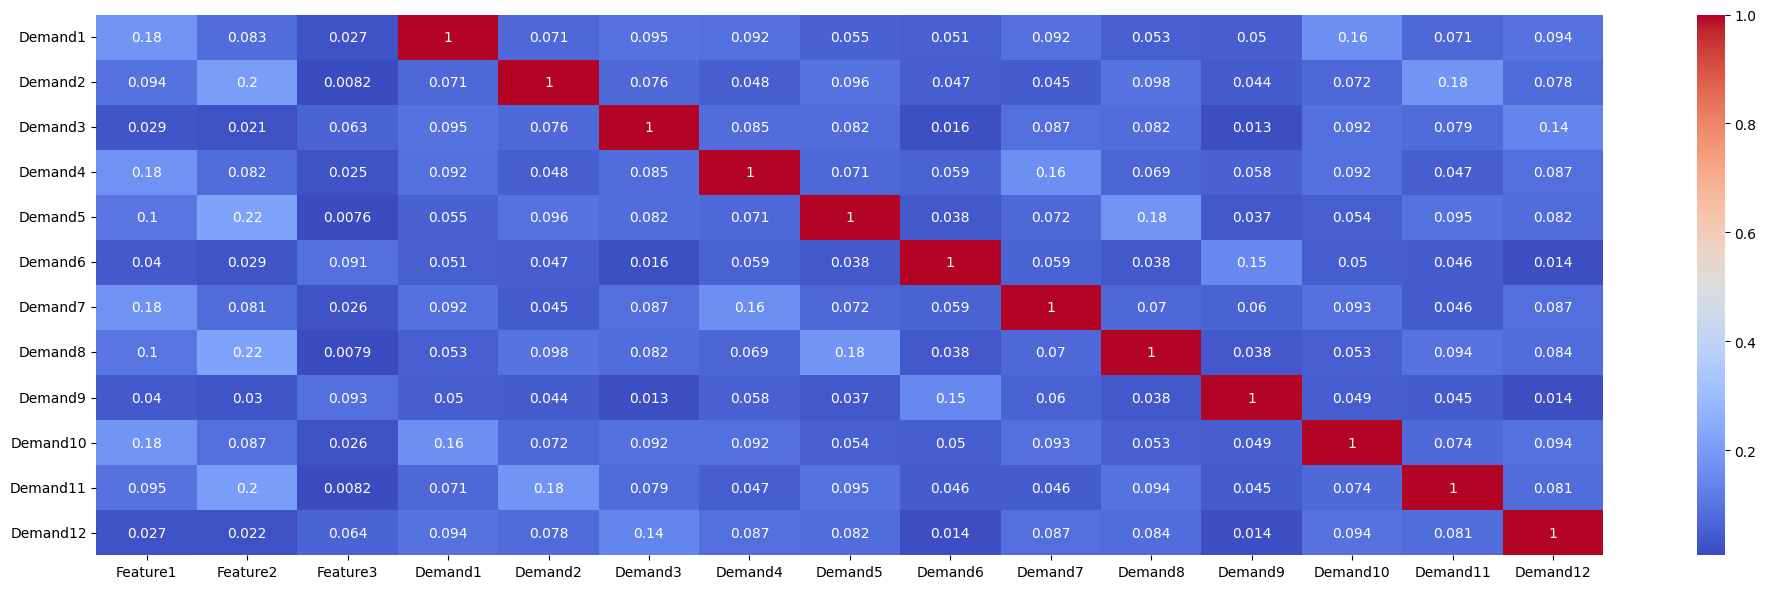

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the features and target into a single dataframe
df1 = pd.concat([df_features, df_target], axis=1)


plt.figure(figsize=(20, 6))

# Compute the correlation matrix
corr_matrix = df1.corr()

# Select only the rows corresponding to the demand data
demand_corr = corr_matrix.loc[df_target.columns]

# Plot the correlation heatmap for the combined dataframe
sns.heatmap(demand_corr, annot=True, cmap='coolwarm')

plt.tight_layout()
plt.show()

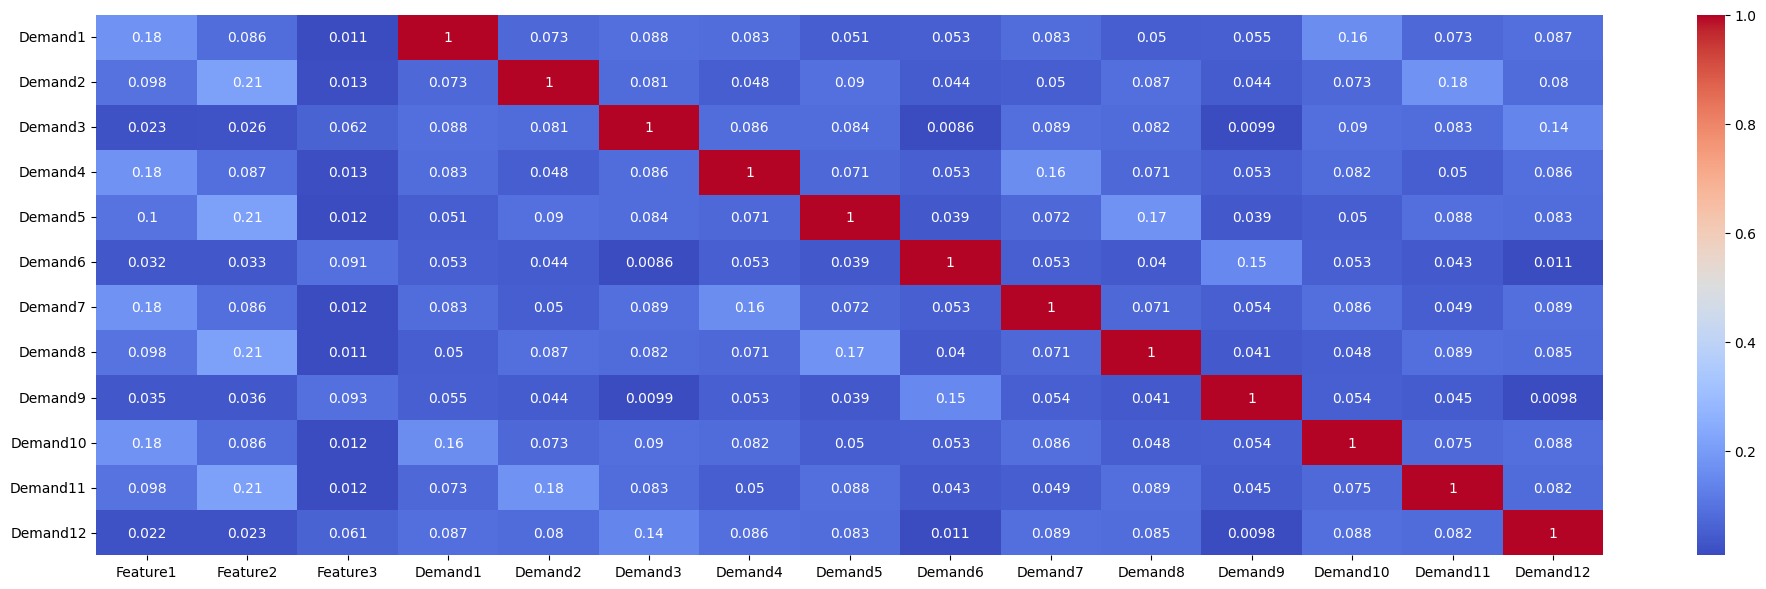

In [5]:
# Combine the features and target into a single dataframe
df2 = pd.concat([df_features_2, df_target_2], axis=1)
plt.figure(figsize=(20, 6))
# Compute the correlation matrix
corr_matrix = df2.corr()
# Select only the rows corresponding to the demand data
demand_corr = corr_matrix.loc[df_target_2.columns]
# Plot the correlation heatmap for the combined dataframe
sns.heatmap(demand_corr, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

0
1
2


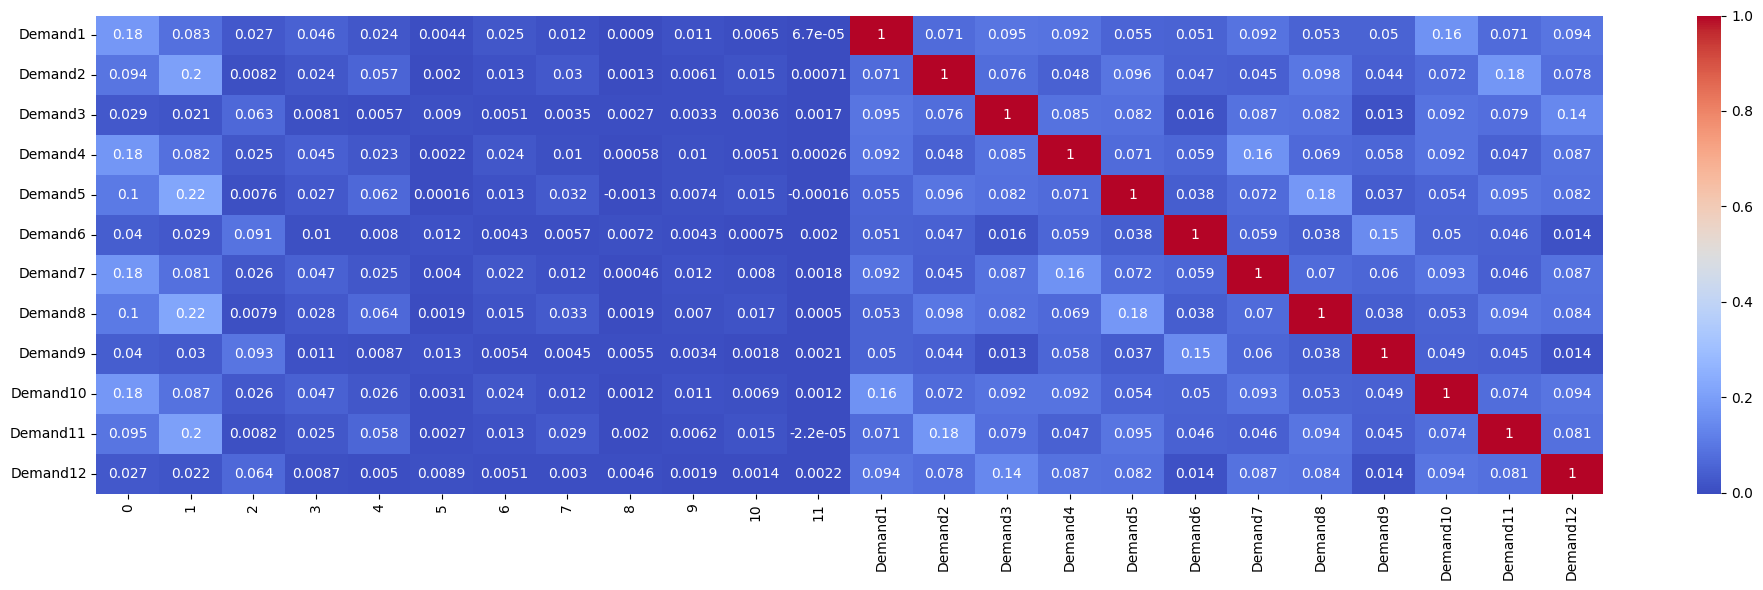

In [10]:
df_features_3 = pd.DataFrame(add_dimensions(df_features, 3))

# Combine the features and target into a single dataframe
df3 = pd.concat([df_features_3, df_target], axis=1)
plt.figure(figsize=(20, 6))
# Compute the correlation matrix
corr_matrix = df3.corr()
# Select only the rows corresponding to the demand data
demand_corr = corr_matrix.loc[df_target.columns]
# Plot the correlation heatmap for the combined dataframe
sns.heatmap(demand_corr, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()